In [1]:
import nlevp as evp
import numpy as np
import matplotlib.pyplot as plt

Let consider a Cardiod as countour given by 
$$\phi(t)=2a(1-cos(t))e^{it}$$
and find eigenvalues of $z\mapsto T(z)=z^2M+zC+K\in \mathbb{C}^{4\times 4}$, where $M, C, K$ are defined below<br>
$T$ has $8$ eigenvalues (see https://www.mathworks.com/help/matlab/ref/polyeig.html). In our contour, we were able to locate $4$ when $a=1$

In [2]:
def Mfunc(z):
    M = np.diag(np.array((3,1,3,1)))
    C = np.array([[0.4,0,-0.3,0], [0,0,0,0],[-0.3,0,0.5,-0.2],[0,0,-0.2,0.2]])
    K = np.array([[-7 ,2, 4,  0], [2 ,-4, 2, 0], [4, 2, -9, 3], [0, 0, 3, -3]])
    return (z**2)*M+z*C+K
cfunc = lambda t: 2*a*(1-np.cos(t))*np.exp(1j*t)
Dcfunc = lambda t: 2*a*(np.sin(t)*np.exp(1j*t)+1j*np.exp(1j*t)*(1-np.cos(t)))
#constants
m = 4
N = 100
K = 4
l = 4
a = 1
solver = evp.nnlinear_holom_eigs_solver(m, N, l, K, Mfunc, cfunc, Dcfunc, rankTol=1e-4, resTol=1e-6)
e, v = solver.eigvals()

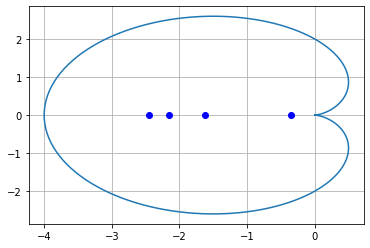

In [3]:
t = np.linspace(0, 2*np.pi, 400, endpoint=True)
s = cfunc(t)
x = s.real 
y = s.imag
plt.figure()
plt.plot(x, y)
plt.plot(e.real, e.imag, 'bo', markersize=6)
plt.grid('on')
plt.show()

In [4]:
#print eigenvalues. a=1 return all negative eigenvalues
e

array([-2.44984944+3.75720930e-17j, -2.1536162 -1.40559239e-15j,
       -1.62477834-4.83102278e-16j, -0.34655157-2.07993676e-16j])

In [5]:
#a=-1 return all positive eigenvalues
a = -1
solver = evp.nnlinear_holom_eigs_solver(m, N, l, K, Mfunc, cfunc, Dcfunc, rankTol=1e-4, resTol=1e-6)
e, v = solver.eigvals()
e

array([0.33529473-1.53328656e-16j, 2.22790873+2.61417804e-16j,
       2.03635098-5.53749747e-16j, 1.47524114-6.62461504e-17j])